## Problem Statement
Insurance companies around the world operate in a very competitive environment. With various aspects of data collected from millions of customers, it is painstakingly hard to analyse and understand the reason for a customer’s decision to switch to a different insurance provider.


For an industry where customer acquisition and retention are equally important, and the former being a more expensive process, insurance companies rely on data to understand customer behaviour to prevent churn. Thus knowing whether a customer is possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from actually happening.

## Data Description
Given are 16 distinguishing factors that can help in understanding the customer churn, your objective as a data scientist is to build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.
We are provided with 16 anonymized factors (feature_0 to feature 15) that influence the churn of customers in the insurance industry.






## Evaluation
We would be using the below **Classification** evaluation metrics.
1. Accuracy
2. Precision
3. Recall
4. ROC Curve
5. AUC
6. F1-Score

### Importing Libraries

In [97]:
# Data Exploration 
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering and Model Building
import imblearn
from collections import Counter
from imblearn.over_sampling import KMeansSMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

# Hyperparameter tuning algorithm technique
from sklearn.model_selection import GridSearchCV

# Model Saving
import joblib

import streamlit

### Dataset Exploration and Analysis

In [2]:
# Importing Data
df_Train = pd.read_csv(r'C:\Users\OlumayowaOyaleke\Desktop\DSML-Projects-1\Churn Analysis\Train.csv',encoding='windows-1252')
df_Test = pd.read_csv(r'C:\Users\OlumayowaOyaleke\Desktop\DSML-Projects-1\Churn Analysis\Test.csv',encoding='windows-1252')

In [3]:
df_Train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,1.701139,-0.248387,-0.457371,-0.792789,-0.569351,4.851829,0.616335,5,0,0,0,0,0,2,10,0,0
33904,1.512791,-0.433625,-1.298476,-0.823854,-0.569351,-0.411453,-0.251940,10,1,2,0,0,0,2,8,3,0
33905,0.006007,-0.395526,0.984523,-0.555919,-0.246560,-0.411453,-0.251940,0,1,1,0,1,0,0,7,3,0
33906,-0.088167,0.789143,0.503892,-0.664647,-0.246560,-0.411453,-0.251940,1,1,1,0,1,0,0,9,3,0


In [4]:
df_Train.shape

(33908, 17)

In [5]:
df_Train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [6]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   33908 non-null  float64
 1   feature_1   33908 non-null  float64
 2   feature_2   33908 non-null  float64
 3   feature_3   33908 non-null  float64
 4   feature_4   33908 non-null  float64
 5   feature_5   33908 non-null  float64
 6   feature_6   33908 non-null  float64
 7   feature_7   33908 non-null  int64  
 8   feature_8   33908 non-null  int64  
 9   feature_9   33908 non-null  int64  
 10  feature_10  33908 non-null  int64  
 11  feature_11  33908 non-null  int64  
 12  feature_12  33908 non-null  int64  
 13  feature_13  33908 non-null  int64  
 14  feature_14  33908 non-null  int64  
 15  feature_15  33908 non-null  int64  
 16  labels      33908 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


In [7]:
df_Train.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

In [8]:
df_Train['feature_7'].value_counts()

1     7286
4     7137
9     5691
0     3891
7     3094
5     1683
6     1164
2     1118
10     988
3      938
8      700
11     218
Name: feature_7, dtype: int64

In [9]:
# Checking nos of values for each feature
for key, value in df_Train.items():
    print(df_Train[key].value_counts())
       

-0.841558    1567
-0.935732    1486
-0.747384    1480
-0.559037    1443
-0.653211    1428
             ... 
 4.149662       2
 5.091402       1
 4.903054       1
 4.620532       1
 4.997228       1
Name: feature_0, Length: 77, dtype: int64
-0.447419    2611
-0.447091     134
-0.446762     125
-0.446106     108
-0.446434     107
             ... 
 1.237786       1
 2.233605       1
 3.685621       1
 0.309297       1
 0.789143       1
Name: feature_1, Length: 6434, dtype: int64
 0.503892    2090
 0.263576    1752
 0.624050    1488
-1.178318    1449
 0.143418    1438
-1.298476    1415
-0.217055    1409
-0.938003    1393
 1.465155    1369
-1.058161    1342
 1.585313    1309
 0.383734    1308
-0.096898    1258
-0.337213    1194
-0.457371    1189
-0.817845    1159
 1.705471    1154
-1.418634    1097
-0.577529    1096
 0.023260    1069
-1.658950     984
 1.344997     874
-1.538792     816
 1.224839     776
 0.864365     688
 0.744208     680
 1.104681     628
 1.825628     489
-0.697687     

In [10]:
df_Train['feature_11'].corr(df_Train['labels'])

-0.13566158602004696

In [11]:
# Exploring correlation to target labels
for key, values in df_Train.items():
    print(df_Train[key].corr(df_Train['labels']))

0.01940548018914612
0.04861127825218313
-0.03334522349070509
0.39297062186531057
-0.07502539257437485
0.10623853550969523
0.11932175355685275
0.03858751882165223
0.046192647713766216
0.06835621705224759
-0.023343871506801176
-0.13566158602004696
-0.06547992907619662
-0.14858300101401
-0.026178005067216282
-0.0791897345265698
1.0


In [12]:
df_Train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,1.701139,-0.248387,-0.457371,-0.792789,-0.569351,4.851829,0.616335,5,0,0,0,0,0,2,10,0,0
33904,1.512791,-0.433625,-1.298476,-0.823854,-0.569351,-0.411453,-0.251940,10,1,2,0,0,0,2,8,3,0
33905,0.006007,-0.395526,0.984523,-0.555919,-0.246560,-0.411453,-0.251940,0,1,1,0,1,0,0,7,3,0
33906,-0.088167,0.789143,0.503892,-0.664647,-0.246560,-0.411453,-0.251940,1,1,1,0,1,0,0,9,3,0


{'whiskers': [<matplotlib.lines.Line2D at 0x25a6aaf6df0>,
 'caps': [<matplotlib.lines.Line2D at 0x25a6ab133d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a6aaf6b20>],
 'medians': [<matplotlib.lines.Line2D at 0x25a6ab13970>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a6ab13c40>],
 'means': []}

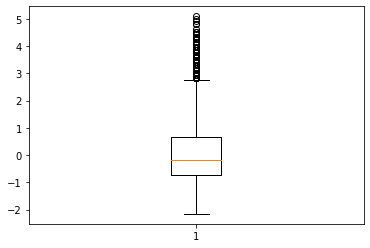

In [13]:
# Exploring Outliers
plt.boxplot(df_Train['feature_0'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25a6ac091c0>,
 'caps': [<matplotlib.lines.Line2D at 0x25a6ac09760>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a6abf7eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x25a6ac09d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a6ac09fd0>],
 'means': []}

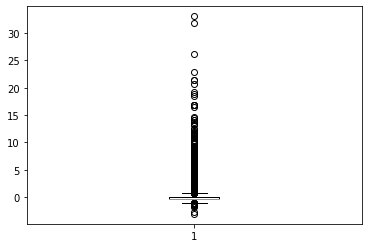

In [14]:
plt.boxplot(df_Train['feature_1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25a6ac67dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x25a6ac7a3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a6ac67af0>],
 'medians': [<matplotlib.lines.Line2D at 0x25a6ac7a970>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a6ac7ac40>],
 'means': []}

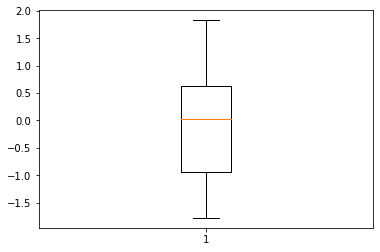

In [15]:
plt.boxplot(df_Train['feature_2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25a6acd4f40>,
 'caps': [<matplotlib.lines.Line2D at 0x25a6ace7550>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a6acd4c70>],
 'medians': [<matplotlib.lines.Line2D at 0x25a6ace7af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a6ace7dc0>],
 'means': []}

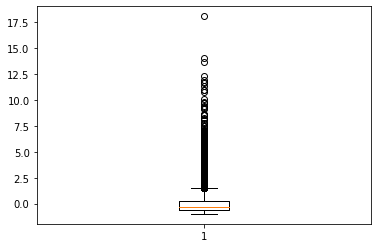

In [16]:
plt.boxplot(df_Train['feature_3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25a6ad42c40>,
 'caps': [<matplotlib.lines.Line2D at 0x25a6ad52220>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a6ad42940>],
 'medians': [<matplotlib.lines.Line2D at 0x25a6ad527f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a6ad52ac0>],
 'means': []}

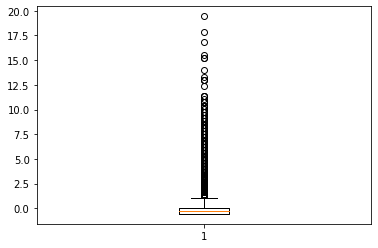

In [17]:
plt.boxplot(df_Train['feature_4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25a6adaae50>,
 'caps': [<matplotlib.lines.Line2D at 0x25a6adbc430>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a6adaab50>],
 'medians': [<matplotlib.lines.Line2D at 0x25a6adbc9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a6adbcca0>],
 'means': []}

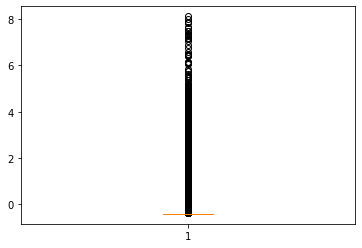

In [18]:
plt.boxplot(df_Train['feature_5'])

In [19]:
lower_limit = df_Train['feature_5'].quantile(0.05)
upper_limit = df_Train['feature_5'].quantile(0.95)

In [20]:
df1 = df_Train[(df_Train['feature_5']>lower_limit) & (df_Train['feature_5']<upper_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x25a6bddfdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x25a6bdf03a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a6bddfaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x25a6bdf0940>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a6bdf0c10>],
 'means': []}

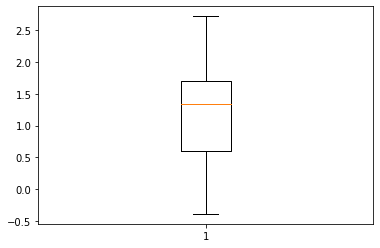

In [21]:
plt.boxplot(df1.feature_5)

In [22]:
df1.shape

(4451, 17)

We wouldnt be handling outliers in this Dataset, there would be a significant percentage of reduction in our data.

### Feature Engineering

In [23]:
df_Train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,1.701139,-0.248387,-0.457371,-0.792789,-0.569351,4.851829,0.616335,5,0,0,0,0,0,2,10,0,0
33904,1.512791,-0.433625,-1.298476,-0.823854,-0.569351,-0.411453,-0.251940,10,1,2,0,0,0,2,8,3,0
33905,0.006007,-0.395526,0.984523,-0.555919,-0.246560,-0.411453,-0.251940,0,1,1,0,1,0,0,7,3,0
33906,-0.088167,0.789143,0.503892,-0.664647,-0.246560,-0.411453,-0.251940,1,1,1,0,1,0,0,9,3,0


In [24]:
# Split Dependent and Independent Variables
X = df_Train.drop('labels', axis = 1)
y = df_Train['labels']

In [25]:
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,1.701139,-0.248387,-0.457371,-0.792789,-0.569351,4.851829,0.616335,5,0,0,0,0,0,2,10,0
33904,1.512791,-0.433625,-1.298476,-0.823854,-0.569351,-0.411453,-0.251940,10,1,2,0,0,0,2,8,3
33905,0.006007,-0.395526,0.984523,-0.555919,-0.246560,-0.411453,-0.251940,0,1,1,0,1,0,0,7,3
33906,-0.088167,0.789143,0.503892,-0.664647,-0.246560,-0.411453,-0.251940,1,1,1,0,1,0,0,9,3


In [26]:
y.head()

0        1
1        0
2        0
3        0
4        0
        ..
33903    0
33904    0
33905    0
33906    0
33907    0
Name: labels, Length: 33908, dtype: int64

In [27]:
# # Handling Imbalanced Data
# km = KMeansSMOTE()
# print('Original Dataset: %s' % Counter(y))
# X_km,y_km = km.fit_resample(X,y)
# print('After Implementing KMeansSMOTE : %s' % Counter(y_km))

In [28]:
# Handling Imbalanced Data
sm = SMOTETomek()
print('Original Dataset: %s' % Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print('After Implementing KMeansSMOTE : %s' % Counter(y_sm))

Original Dataset: Counter({0: 29941, 1: 3967})
After Implementing KMeansSMOTE : Counter({1: 29886, 0: 29886})


array([[<AxesSubplot:title={'center':'feature_0'}>,
        <AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_2'}>,
        <AxesSubplot:title={'center':'feature_3'}>],
       [<AxesSubplot:title={'center':'feature_4'}>,
        <AxesSubplot:title={'center':'feature_5'}>,
        <AxesSubplot:title={'center':'feature_6'}>,
        <AxesSubplot:title={'center':'feature_7'}>],
       [<AxesSubplot:title={'center':'feature_8'}>,
        <AxesSubplot:title={'center':'feature_9'}>,
        <AxesSubplot:title={'center':'feature_10'}>,
        <AxesSubplot:title={'center':'feature_11'}>],
       [<AxesSubplot:title={'center':'feature_12'}>,
        <AxesSubplot:title={'center':'feature_13'}>,
        <AxesSubplot:title={'center':'feature_14'}>,
        <AxesSubplot:title={'center':'feature_15'}>]], dtype=object)

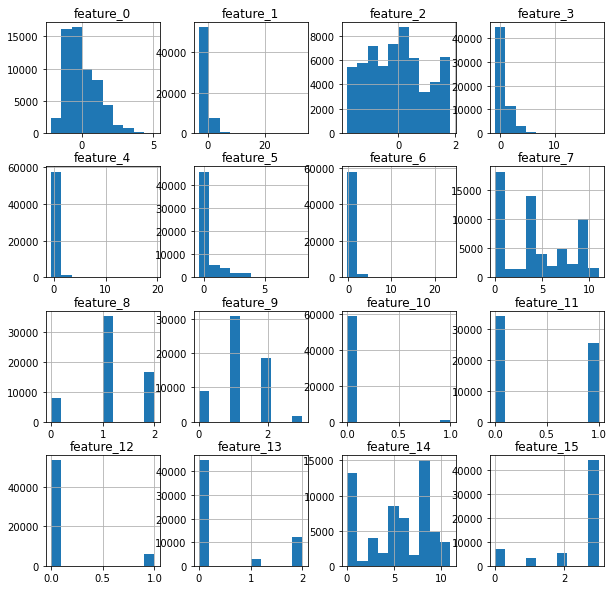

In [29]:
# Compare SMOTETOMEK Features and Original Features Disribution
# X_sm 
X_sm.hist(figsize=(10,10
))

array([[<AxesSubplot:title={'center':'feature_0'}>,
        <AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_2'}>,
        <AxesSubplot:title={'center':'feature_3'}>],
       [<AxesSubplot:title={'center':'feature_4'}>,
        <AxesSubplot:title={'center':'feature_5'}>,
        <AxesSubplot:title={'center':'feature_6'}>,
        <AxesSubplot:title={'center':'feature_7'}>],
       [<AxesSubplot:title={'center':'feature_8'}>,
        <AxesSubplot:title={'center':'feature_9'}>,
        <AxesSubplot:title={'center':'feature_10'}>,
        <AxesSubplot:title={'center':'feature_11'}>],
       [<AxesSubplot:title={'center':'feature_12'}>,
        <AxesSubplot:title={'center':'feature_13'}>,
        <AxesSubplot:title={'center':'feature_14'}>,
        <AxesSubplot:title={'center':'feature_15'}>]], dtype=object)

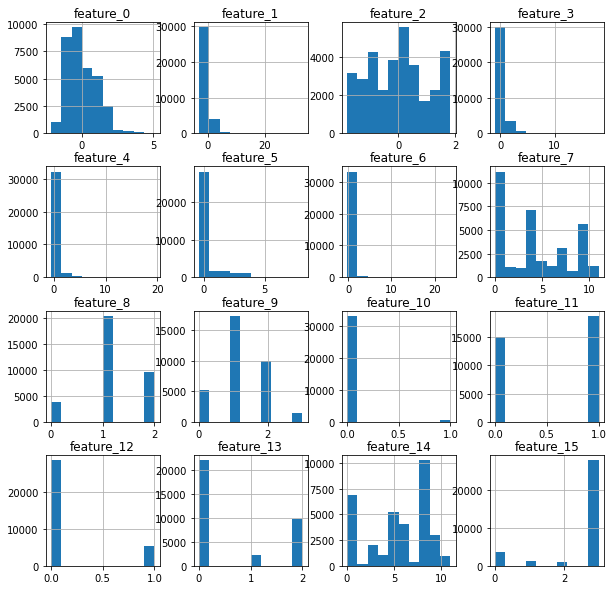

In [30]:
# X
X.hist(figsize=(10,10
))

In [31]:
# Split into Train and Validation
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size= 0.2, random_state=42)

In [32]:
X_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
50458,0.205756,-0.203392,1.308588,-0.478741,-0.344369,-0.411453,-0.251940,4,1,1,0,1,0,0,3,3
45907,-1.120342,-0.274992,1.342612,1.393413,-0.246560,-0.411453,-0.251940,0,2,1,0,1,0,2,8,3
35981,0.596517,-0.179521,1.676249,1.706248,-0.569351,-0.411453,-0.251940,9,0,1,0,0,0,2,8,3
20078,0.100181,-0.420159,-0.577529,-0.536504,-0.246560,-0.411453,-0.251940,9,1,1,0,1,1,0,8,3
41819,-0.058215,0.413116,1.705471,1.057058,-0.399565,1.385611,0.387982,6,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.088651,0.617969,0.619146,0.778366,-0.414542,-0.411453,-0.251940,9,1,2,0,0,0,0,0,3
38158,-0.128485,-0.835342,0.143418,2.406888,-0.108364,-0.411453,-0.251940,6,1,1,0,1,0,0,0,3
860,0.006007,0.109608,-0.817845,2.406900,0.076230,-0.411453,-0.251940,4,2,2,0,1,0,2,8,3
15795,-0.276515,1.414485,1.705471,-0.882101,-0.569351,-0.411453,-0.251940,3,1,2,0,1,0,2,8,3


In [33]:
X_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
54210,1.136095,0.145452,-0.620842,-0.342133,0.105319,0.559197,2.826148,4,1,2,0,0,0,0,8,2
34616,0.282670,-0.431540,-0.100635,1.156568,-0.559310,3.303649,0.616335,1,1,0,0,1,0,0,8,0
33255,0.476877,-0.264480,0.263576,-0.656880,-0.569351,-0.411453,-0.251940,1,1,0,0,0,0,2,6,3
37483,-0.155206,-0.356893,-1.269964,-0.174189,-0.569351,0.505004,2.043841,9,1,1,0,0,0,0,7,1
17108,-1.029906,0.656783,-0.457371,-0.610283,-0.246560,-0.411453,-0.251940,3,2,2,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,-0.464863,-0.338050,-1.058161,-0.831621,-0.246560,-0.411453,-0.251940,9,2,1,0,0,0,0,1,3
49883,0.385312,0.038934,-1.658950,0.246386,-0.569351,0.166175,2.470141,1,1,1,0,1,0,0,6,0
31934,-0.841558,-0.368595,-0.217055,-0.668530,0.076230,-0.411453,-0.251940,9,1,2,0,1,1,0,5,3
2087,0.100181,-0.725605,1.344997,-0.470491,-0.246560,-0.411453,-0.251940,0,2,1,0,1,0,2,8,3


In [34]:
# Scale Data
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [35]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled

array([[0.32624753, 0.07954894, 0.85656638, ..., 0.        , 0.27272727,
        1.        ],
       [0.14337263, 0.07756973, 0.86600512, ..., 1.        , 0.72727273,
        1.        ],
       [0.38013523, 0.0802088 , 0.95856014, ..., 1.        , 0.72727273,
        1.        ],
       ...,
       [0.2987013 , 0.08820111, 0.26666667, ..., 1.        , 0.72727273,
        1.        ],
       [0.25974026, 0.12427142, 0.96666667, ..., 1.        , 0.72727273,
        1.        ],
       [0.31217315, 0.07471235, 0.49813338, ..., 0.        , 0.        ,
        1.        ]])

In [37]:
scaler.data_max_

array([ 5.09140213, 33.09477576,  1.82562845, 18.09469981, 19.44364734,
        8.1276477 , 23.62564416, 11.        ,  2.        ,  3.        ,
        1.        ,  1.        ,  1.        ,  2.        , 11.        ,
        3.        ])

In [38]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [39]:
X_train_scaled.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.326248,0.079549,0.856566,0.027425,0.011242,0.000000,0.0000,0.363636,0.5,0.333333,0.0,1.0,0.0,0.0,0.272727,1.000000
1,0.143373,0.077570,0.866005,0.125458,0.016129,0.000000,0.0000,0.000000,1.0,0.333333,0.0,1.0,0.0,1.0,0.727273,1.000000
2,0.380135,0.080209,0.958560,0.141839,0.000000,0.000000,0.0000,0.818182,0.0,0.333333,0.0,0.0,0.0,1.0,0.727273,1.000000
3,0.311688,0.073557,0.333333,0.024400,0.016129,0.000000,0.0000,0.818182,0.5,0.333333,0.0,1.0,1.0,0.0,0.727273,1.000000
4,0.289845,0.096591,0.966667,0.107845,0.008484,0.210451,0.0268,0.545455,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47812,0.310098,0.102254,0.665306,0.093252,0.007735,0.000000,0.0000,0.818182,0.5,0.666667,0.0,0.0,0.0,0.0,0.000000,1.000000
47813,0.280154,0.062080,0.533333,0.178527,0.023034,0.000000,0.0000,0.545455,0.5,0.333333,0.0,1.0,0.0,0.0,0.000000,1.000000
47814,0.298701,0.088201,0.266667,0.178528,0.032258,0.000000,0.0000,0.363636,1.0,0.666667,0.0,1.0,0.0,1.0,0.727273,1.000000
47815,0.259740,0.124271,0.966667,0.006303,0.000000,0.000000,0.0000,0.272727,0.5,0.666667,0.0,1.0,0.0,1.0,0.727273,1.000000


array([[<AxesSubplot:title={'center':'feature_0'}>,
        <AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_2'}>,
        <AxesSubplot:title={'center':'feature_3'}>],
       [<AxesSubplot:title={'center':'feature_4'}>,
        <AxesSubplot:title={'center':'feature_5'}>,
        <AxesSubplot:title={'center':'feature_6'}>,
        <AxesSubplot:title={'center':'feature_7'}>],
       [<AxesSubplot:title={'center':'feature_8'}>,
        <AxesSubplot:title={'center':'feature_9'}>,
        <AxesSubplot:title={'center':'feature_10'}>,
        <AxesSubplot:title={'center':'feature_11'}>],
       [<AxesSubplot:title={'center':'feature_12'}>,
        <AxesSubplot:title={'center':'feature_13'}>,
        <AxesSubplot:title={'center':'feature_14'}>,
        <AxesSubplot:title={'center':'feature_15'}>]], dtype=object)

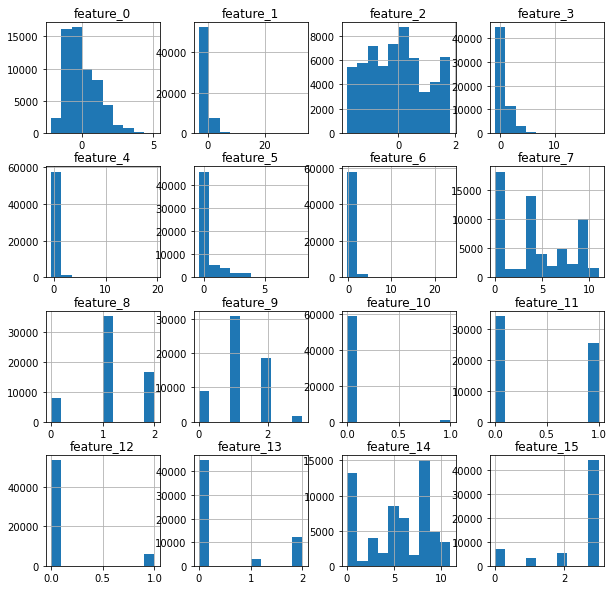

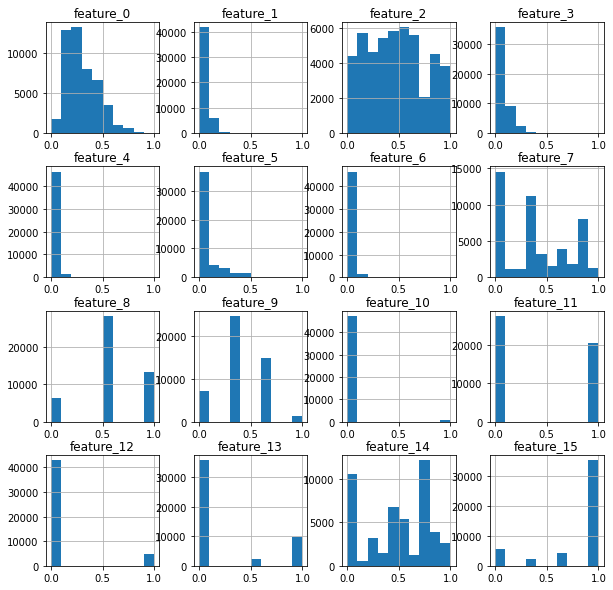

In [40]:
# Compare Scaled with Normal
X_sm.hist(figsize=(10,10))
X_train_scaled.hist(figsize=(10,10))

### Model Building and Evaluation

In [41]:
# Importing Estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier


In [42]:
# Initializing Estimators
RFC = RandomForestClassifier()
LR =  LogisticRegression()
SVM = SVC()
ABC = AdaBoostClassifier()

In [43]:
# Test Training
RFC.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [44]:
y_preds = RFC.predict(X_test_scaled)

In [45]:
y_preds

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [46]:
y_test

54210    1
34616    1
33255    0
37483    1
17108    0
        ..
12838    0
49883    1
31934    0
2087     0
58334    1
Name: labels, Length: 11955, dtype: int64

In [47]:
print(classification_report(y_true=y_test,y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5923
           1       0.93      0.96      0.94      6032

    accuracy                           0.94     11955
   macro avg       0.94      0.94      0.94     11955
weighted avg       0.94      0.94      0.94     11955



In [62]:
# Initializing ADABOOST SVM Base Classifier 
ADARFC = AdaBoostClassifier(n_estimators=20,base_estimator=RandomForestClassifier())

In [63]:
# Creating Models Dictionary
models = {"LR": LogisticRegression(),
"SVM": SVC(),
"RFC":RandomForestClassifier(),
"ADABOOST": ABC,
"ADARFC": ADARFC}

#Creating Function to Fit and Score
def fit_score(models,X_train,X_test,y_train,y_test):
    
    #Set Random Seed
    np.random.seed(42)

    #Make dictionary to keep scores
    model_scores = {}

    #Loop through models
    for name,model in models.items():
        model.fit(X_train,y_train)

        #Evaluate model and append score
        model_scores[name] = model.score(X_test,y_test)

        y_preds = model.predict(X_test)
        print(classification_report(y_test,y_preds))
        

    return model_scores

model_scores = fit_score(models = models,
X_train = X_train_scaled,
y_train = y_train,
X_test = X_test_scaled,
y_test = y_test
)


              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5923
           1       0.83      0.85      0.84      6032

    accuracy                           0.83     11955
   macro avg       0.83      0.83      0.83     11955
weighted avg       0.83      0.83      0.83     11955

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      5923
           1       0.84      0.88      0.86      6032

    accuracy                           0.86     11955
   macro avg       0.86      0.86      0.86     11955
weighted avg       0.86      0.86      0.86     11955

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5923
           1       0.92      0.96      0.94      6032

    accuracy                           0.94     11955
   macro avg       0.94      0.94      0.94     11955
weighted avg       0.94      0.94      0.94     11955

              preci

### Model Comparison and Evaluation

In [64]:
model_scores

{'LR': 0.8328732747804266,
 'SVM': 0.8572982015892932,
 'RFC': 0.9421999163529904,
 'ADABOOST': 0.8814721873693016,
 'ADARFC': 0.943370974487662}

In [65]:
Comparison = pd.DataFrame(model_scores,index=['Accuracy'])

In [66]:
Comparison

,LR,SVM,RFC,ADABOOST,ADARFC
Accuracy,0.832873,0.857298,0.9422,0.881472,0.943371


<AxesSubplot:>

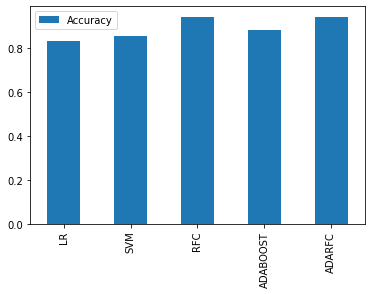

In [67]:
Comparison.T.plot(kind= 'bar')

In [68]:
from sklearn import metrics

c:\Users\OlumayowaOyaleke\Desktop\DSML-Projects-1\Churn Analysis\ChurnEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


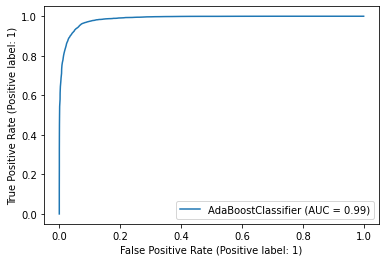

In [69]:
# ROC Curve for ADABOOST CLASSIFIER
metrics.plot_roc_curve(ADARFC,X_test_scaled,y_test)
plt.show()

c:\Users\OlumayowaOyaleke\Desktop\DSML-Projects-1\Churn Analysis\ChurnEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


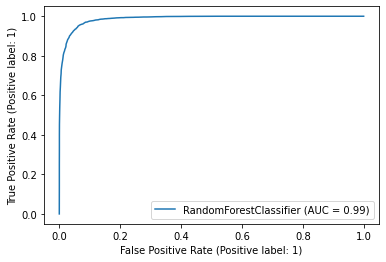

In [70]:
# ROC Curve for RANDOM FOREST CLASSIFIER
metrics.plot_roc_curve(RFC,X_test_scaled,y_test)
plt.show()

In [ ]:
LOG = LogisticRegression().fit(X_train_scaled,y_train)

c:\Users\OlumayowaOyaleke\Desktop\DSML-Projects-1\Churn Analysis\ChurnEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


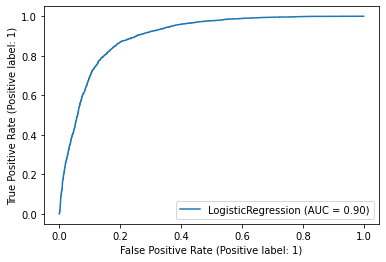

In [78]:
# ROC Curve for Logistic Regression
metrics.plot_roc_curve(LOG,X_test_scaled,y_test)
plt.show()

In [81]:
y_preds_ADARFC = ADARFC.predict(X_test_scaled)

In [83]:
y_preds_RFC = RFC.predict(X_test_scaled)

In [82]:
# confusion matrix ADARFC
print(confusion_matrix(y_test,y_preds_ADARFC))

[[5459  464]
 [ 213 5819]]


In [84]:
# confusion matrix RFC
print(confusion_matrix(y_test,y_preds_RFC))

[[5454  469]
 [ 226 5806]]


From our evaluation analysis, we can deduct that AdaBoostClassifier combined with the RandomForestClassifier as its base estimator produces the best result, we would be making used of this estimator.

**(ADARFC)**

### Preprocessing Function


In [109]:
def pre_processing(data):
    data = scaler.transform(data)
    data = pd.DataFrame(data,columns=X_train.columns)
    return data    
    

In [110]:
#Impot Test Data
df_Test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,-0.411453,-0.251940,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0.547323,0.182198,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,-0.411453,-0.251940,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,-0.411453,-0.251940,8,2,1,0,1,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11298,-0.464863,-0.507195,-0.938003,-0.928699,1.044601,2.634659,4.523577,7,1,1,0,1,1,0,8,1
11299,1.512791,-0.439865,1.825628,-0.905400,1.690181,-0.411453,-0.251940,1,1,0,0,1,0,1,5,3
11300,-0.559037,0.369073,1.104681,0.026549,-0.569351,-0.411453,-0.251940,4,2,2,0,1,0,0,8,3
11301,-0.653211,-0.440522,0.143418,0.286718,-0.569351,3.054123,1.050473,0,1,1,0,0,0,0,0,0


In [111]:
# pre_process Test data
test_data = pre_processing(df_Test)

In [112]:
test_data.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.376623,0.096417,0.766667,0.053070,0.000000,0.000000,0.000000,0.000000,0.5,0.333333,0.0,0.0,0.0,0.0,1.000000,1.000000
1,0.142857,0.080557,0.633333,0.035584,0.064516,0.112281,0.018182,0.000000,1.0,0.333333,0.0,0.0,0.0,0.0,0.454545,0.333333
2,0.363636,0.089182,0.333333,0.016267,0.016129,0.000000,0.000000,0.000000,0.5,0.333333,0.0,0.0,0.0,0.0,0.090909,1.000000
3,0.519481,0.072803,1.000000,0.001017,0.387097,0.000000,0.000000,0.090909,0.5,0.000000,0.0,1.0,0.0,0.0,0.454545,1.000000
4,0.168831,0.075091,0.166667,0.035584,0.032258,0.000000,0.000000,0.727273,1.0,0.333333,0.0,1.0,0.0,1.0,0.727273,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11298,0.233766,0.071151,0.233333,0.003863,0.080645,0.356725,0.200000,0.636364,0.5,0.333333,0.0,1.0,1.0,0.0,0.727273,0.333333
11299,0.506494,0.073012,1.000000,0.005083,0.112903,0.000000,0.000000,0.090909,0.5,0.000000,0.0,1.0,0.0,0.5,0.454545,1.000000
11300,0.220779,0.095373,0.800000,0.053884,0.000000,0.000000,0.000000,0.363636,1.0,0.666667,0.0,1.0,0.0,0.0,0.727273,1.000000
11301,0.207792,0.072994,0.533333,0.067507,0.000000,0.405848,0.054545,0.000000,0.5,0.333333,0.0,0.0,0.0,0.0,0.000000,0.000000


### Model Saving

In [113]:
# Model Saving
joblib.dump(ADARFC,"Churn_Detection_Model_joblib")

['Churn_Detection_Model_joblib']

In [114]:
Churn_Model = joblib.load("Churn_Detection_Model_joblib")

### Model Prediction

In [115]:
result = Churn_Model.predict(test_data)

In [116]:
result

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [117]:
result = pd.DataFrame(result,columns=["result"])

In [118]:
result

,result
0,1
1,0
2,0
3,0
4,0
...,...
11298,0
11299,0
11300,0
11301,1


In [119]:
predictions = test_data.copy()

In [120]:
predictions["Predictions"]=result

In [121]:
predictions.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,Predictions
0,0.376623,0.096417,0.766667,0.053070,0.000000,0.000000,0.000000,0.000000,0.5,0.333333,0.0,0.0,0.0,0.0,1.000000,1.000000,1
1,0.142857,0.080557,0.633333,0.035584,0.064516,0.112281,0.018182,0.000000,1.0,0.333333,0.0,0.0,0.0,0.0,0.454545,0.333333,0
2,0.363636,0.089182,0.333333,0.016267,0.016129,0.000000,0.000000,0.000000,0.5,0.333333,0.0,0.0,0.0,0.0,0.090909,1.000000,0
3,0.519481,0.072803,1.000000,0.001017,0.387097,0.000000,0.000000,0.090909,0.5,0.000000,0.0,1.0,0.0,0.0,0.454545,1.000000,0
4,0.168831,0.075091,0.166667,0.035584,0.032258,0.000000,0.000000,0.727273,1.0,0.333333,0.0,1.0,0.0,1.0,0.727273,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11298,0.233766,0.071151,0.233333,0.003863,0.080645,0.356725,0.200000,0.636364,0.5,0.333333,0.0,1.0,1.0,0.0,0.727273,0.333333,0
11299,0.506494,0.073012,1.000000,0.005083,0.112903,0.000000,0.000000,0.090909,0.5,0.000000,0.0,1.0,0.0,0.5,0.454545,1.000000,0
11300,0.220779,0.095373,0.800000,0.053884,0.000000,0.000000,0.000000,0.363636,1.0,0.666667,0.0,1.0,0.0,0.0,0.727273,1.000000,0
11301,0.207792,0.072994,0.533333,0.067507,0.000000,0.405848,0.054545,0.000000,0.5,0.333333,0.0,0.0,0.0,0.0,0.000000,0.000000,1


In [125]:
predictions[predictions["Predictions"]==1]

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,Predictions
0,0.376623,0.096417,0.766667,0.053070,0.000000,0.000000,0.000000,0.000000,0.5,0.333333,0.0,0.0,0.0,0.0,1.000000,1.000000,1
11,0.402597,0.075373,0.833333,0.124847,0.016129,0.000000,0.000000,0.000000,0.0,0.333333,0.0,1.0,0.0,1.0,0.727273,1.000000,1
24,0.402597,0.075663,0.333333,0.048800,0.000000,0.000000,0.000000,0.181818,0.0,0.666667,0.0,0.0,0.0,0.0,1.000000,1.000000,1
26,0.194805,0.074755,0.466667,0.033754,0.000000,0.000000,0.000000,0.090909,0.5,0.333333,0.0,0.0,0.0,0.0,0.000000,1.000000,1
37,0.311688,0.079013,0.200000,0.033144,0.000000,0.218713,0.018182,0.000000,1.0,0.333333,0.0,0.0,0.0,0.0,0.181818,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11280,0.831169,0.150909,0.200000,0.087231,0.000000,0.000000,0.000000,0.454545,0.5,0.000000,0.0,0.0,0.0,0.0,0.454545,1.000000,1
11281,0.129870,0.084061,0.100000,0.172631,0.000000,0.000000,0.000000,0.363636,0.5,0.666667,0.0,0.0,0.0,0.0,0.090909,1.000000,1
11290,0.129870,0.078904,0.100000,0.035380,0.000000,0.000000,0.000000,0.363636,1.0,0.666667,0.0,0.0,0.0,0.0,0.727273,1.000000,1
11295,0.220779,0.085223,0.400000,0.032330,0.016129,0.092398,0.054545,0.818182,0.5,0.333333,0.0,0.0,0.0,0.0,0.090909,0.666667,1
